## Percentage of artifacts by type in a project
NOTE: Please insert the password in order to access to the database and select one of the available projects

In [1]:
from widget_funcs import show_project_widget
import getpass
import ipywidgets as widgets

# Input parameters
password = getpass.getpass('Enter password for the mongodb database:')
projectW = show_project_widget(password)

display(projectW)

Enter password for the mongodb database:········


Dropdown(description='Project:', index=2, options=('OpenCV', 'mythaistar2', 'mythaistar', 'mydb', 'mydb2', 'te…

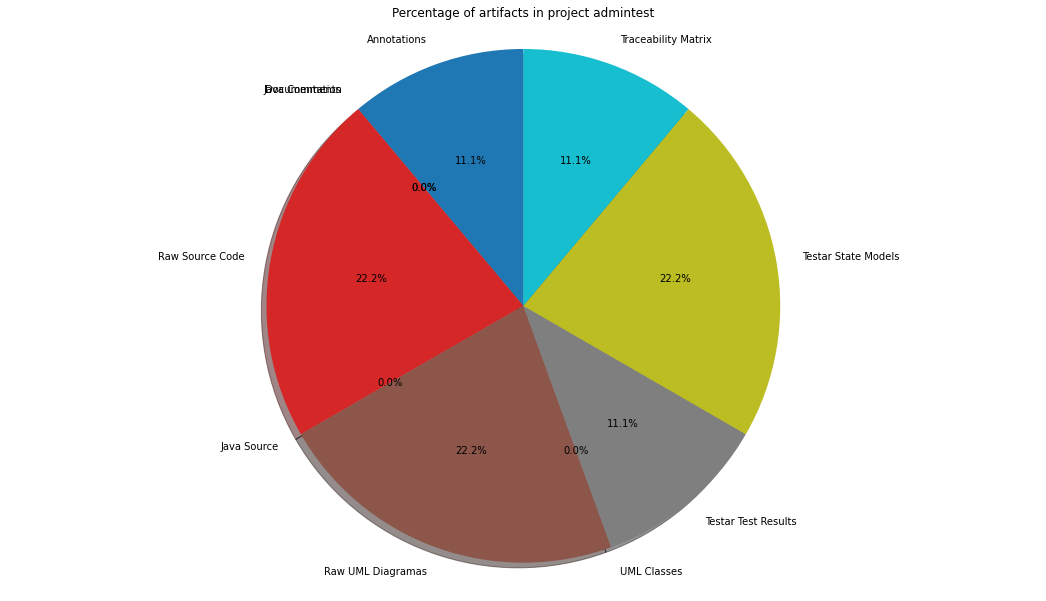

In [3]:
from pymongo import MongoClient
from decoderpkm import GetConn, GetConf
from IPython.display import HTML, display
import pymongo
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np


# Take project name from widget
project = projectW.value


client = GetConn(password)

collectionNames = [ 'Annotations', 'commentsjava', 'Documentation',
                    'RawSourcecode', 'sourcecodeJava', 'RawUML', 'UMLClasses', 
                    'TESTARStateModels', 'TESTARTestResults', 'TraceabilityMatrix']

collectionLabels = ['Annotations', 'Java Comments', 'Documentation',
                    'Raw Source Code', 'Java Source', 'Raw UML Diagramas', 'UML Classes',
                    'Testar Test Results', 'Testar State Models', 'Traceability Matrix']

counts = []

i = 0
for col in collectionNames:
    count = client[project][col].count_documents({})
    counts.append( count )
    i = i + 1
    
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig, ax = plt.subplots()
ax.pie(counts, labels=collectionLabels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentage of artifacts in project ' + project)

fig.set_size_inches(18.5, 10.5)
plt.show()